# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension,
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.600543e+01     1.482943e+01
 * time: 0.0016949176788330078
     1     3.486833e+01     8.463688e+00
 * time: 0.004406929016113281
     2     2.416088e+01     2.853102e+00
 * time: 0.01047205924987793
     3     2.094932e+01     2.051100e+00
 * time: 0.01587700843811035
     4     2.001974e+01     2.137695e+00
 * time: 0.020574092864990234
     5     1.929173e+01     1.789750e+00
 * time: 0.025131940841674805
     6     1.874937e+01     1.391201e+00
 * time: 0.029714107513427734
     7     1.824114e+01     1.085866e+00
 * time: 0.03430891036987305
     8     1.797700e+01     1.063569e+00
 * time: 0.03884100914001465
     9     1.781384e+01     7.693131e-01
 * time: 0.04340004920959473
    10     1.772110e+01     7.818940e-01
 * time: 0.04814410209655762
    11     1.763940e+01     5.643312e-01
 * time: 0.05266594886779785
    12     1.758822e+01     5.997183e-01
 * time: 0.05625104904174805
    13     1.753120e+01     4.356091e-01
 *

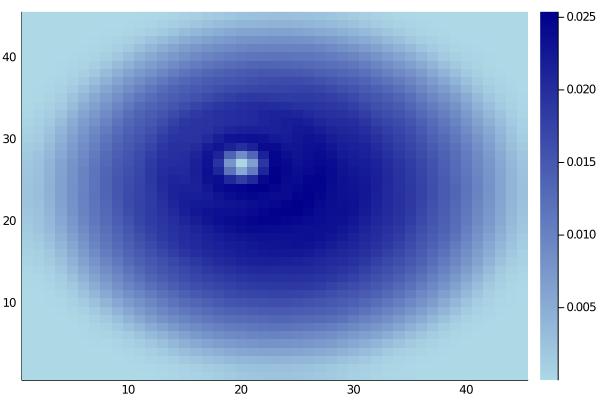

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)